<a href="https://colab.research.google.com/github/DirceoQA/00SaturdayAI_2020_AB/blob/master/AI_Beginrers_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#define 

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/dataset22.csv", encoding = "ISO-8859-1")
# df.head()
#df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/dataset11.csv")


In [0]:
df.head()

NameError: ignored

Se empieza con el anális de los datos con una función logarítmica


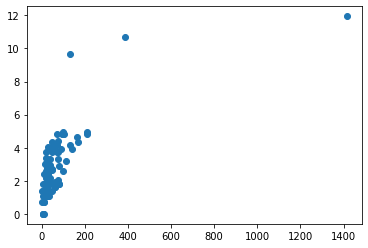

In [0]:
import numpy as np
import matplotlib.pyplot as pltx
# log tranfirmación logarit Estudia repasar, practicar!!!
# filtrar datos en pandas(resulttype) | pEa ver solo los Link clicks
#pltx.plot(df["Impressions"],np.log(df["Results"]),"o")
pltx.plot(df["Amount Spent (MXN)"],np.log(df["Results"]),"o")



Se realiza matriz de correlación
El campo "**Result Type**" que es STRING se trasformó a números en nuevo campo "**Goal**"




100 = Event Responses



200 = Link Clicks



300 = Post Engagement


In [0]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


#Variables , matriz de correlación. sube amoun sube result, Negativo= uno sube otro baja, POST: Uno sube el otro sube 0=no parace tener buena relación

,Age,Goal,Impressions,Frequency,Reach,Results,Amount Spent (MXN),Cost per Result
Age,1.000000,-0.051494,-0.060033,0.141627,-0.072817,0.014049,0.065579,0.061758
Goal,-0.051494,1.000000,-0.119884,-0.215846,-0.089495,0.163268,0.115432,0.813997
Impressions,-0.060033,-0.119884,1.000000,0.301487,0.947426,-0.102747,-0.090374,-0.300164
Frequency,0.141627,-0.215846,0.301487,1.000000,0.052662,-0.129093,-0.115971,-0.126214
Reach,-0.072817,-0.089495,0.947426,0.052662,1.000000,-0.098202,-0.082485,-0.256601
Results,0.014049,0.163268,-0.102747,-0.129093,-0.098202,1.000000,0.958186,0.175955
Amount Spent (MXN),0.065579,0.115432,-0.090374,-0.115971,-0.082485,0.958186,1.000000,0.134756
Cost per Result,0.061758,0.813997,-0.300164,-0.126214,-0.256601,0.175955,0.134756,1.000000


In [0]:
# Practicando: Graficar plot (no tiene que ver con el tema/proyecto)
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, .25)
y = np.sin(x)
plt.plot(x, y,"o")


In [0]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

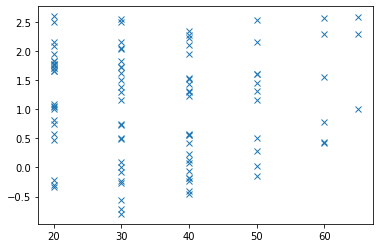

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# log tranfirmación logarit Estudia repasar, practicar!!!
# filtrar datos en pandas(resulttype) | pEa ver solo los Link clicks
#plt.plot(df["Impressions"],np.log(df["Results"]),"o")
plt.plot(df["Age"],np.log(df["Cost per Result"]),"x")

#Nota: Graficando las edades por edad (decadas 20-60/65) 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Age")
plt.ylabel("Cost per Result")
#plt.scatter(df["Age"],np.log(df["Cost per Result"]),"x")
plt.scatter(df["Age"], df["Cost per Result"], data=data"o")




Después de practicar con regresión linear, nos dimos cuenta que no era un buen modelo para predecir, nuestro mentor Eric, nos dio una clase especial sobre como podría ser con un nuevo modelo como **RANDOM FOREST**, por cierto se vio muy bonito :)
Además con la manipulación de datos se puderon samplear aprox 100 registros en total, dejando capacidad para datos de entenamiento y pruebas (QA) :P




In [0]:
help (sklearn)



In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#Se declara en X los atributos con los que se cuenta
X = df[["Age", "Impressions",	"Frequency",	"Reach",	"Results",	"Amount Spent (MXN)"]]
y = df["Cost per Result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [0]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
modelo.score(X_test, y_test)

-0.30119451693475363

In [0]:
ypred = modelo.predict(X_test)

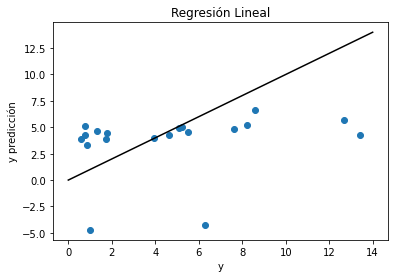

In [0]:
plt.plot(y_test, ypred, "o")
plt.title("Regresión Lineal")
plt.xlabel("y")
plt.ylabel("y predicción")
xref = np.arange(0, y_test.max()+1, 1)
plt.plot(xref, xref, "-", color="black")


In [0]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

In [0]:
modelo2 = RandomForestRegressor(max_depth=3)

In [0]:
modelo2.fit(X_train, y_train)

In [0]:
modelo2.score(X_test, y_test)

NameError: ignored

In [0]:
ypred = modelo2.predict(X_test)

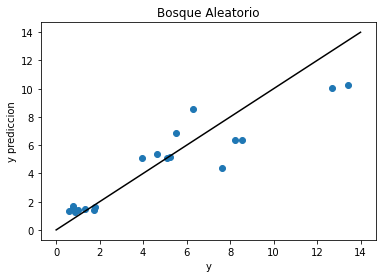

In [0]:
plt.plot(y_test, ypred, "o")
plt.title("Bosque Aleatorio")
plt.xlabel("y")
plt.ylabel("y prediccion")
xref = np.arange(0, y_test.max()+1, 1)
plt.plot(xref, xref, "-", color="black")

Feature ranking:
 #   Imp cumImp  sdev Input
 1 0.467  0.467 0.158 Results
 2 0.293  0.760 0.111 Amount Spent (MXN)
 3 0.107  0.867 0.103 Frequency
 4 0.073  0.939 0.111 Reach
 5 0.032  0.971 0.062 Age
 6 0.029  1.000 0.087 Impressions


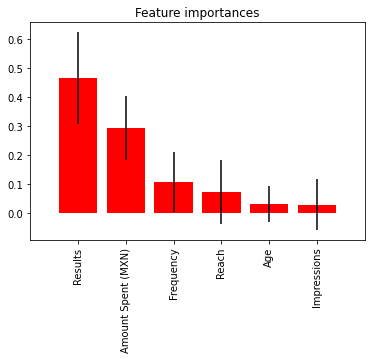

In [0]:
def print_rf_importances(m, X):
    importances = m.feature_importances_
    std = np.std([tree.feature_importances_ for tree in m.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")

    s=0
    print(" #   Imp cumImp  sdev Input")
    for f in range(X.shape[1]):
        s = s + importances[indices[f]]
        print("%2d %0.3f  %0.3f %0.3f %s" % (f + 1, importances[indices[f]], s, std[indices[f]], X.columns[indices[f]]))

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
          color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation="vertical")
    plt.xlim([-1, X.shape[1]])
    plt.show()

print_rf_importances(modelo2, X_train)

[Text(804.8076923076923, 475.65000000000003, 'Results <= 8.5\nmse = 11.566\nsamples = 45\nvalue = 4.453'),
 Text(429.2307692307692, 339.75, 'Amount Spent (MXN) <= 35.26\nmse = 10.821\nsamples = 26\nvalue = 6.371'),
 Text(214.6153846153846, 203.85000000000002, 'Reach <= 164.5\nmse = 5.431\nsamples = 16\nvalue = 4.742'),
 Text(107.3076923076923, 67.94999999999999, 'mse = 0.0\nsamples = 1\nvalue = 13.38'),
 Text(321.9230769230769, 67.94999999999999, 'mse = 2.544\nsamples = 15\nvalue = 4.396'),
 Text(643.8461538461538, 203.85000000000002, 'Amount Spent (MXN) <= 60.705\nmse = 5.668\nsamples = 10\nvalue = 9.63'),
 Text(536.5384615384615, 67.94999999999999, 'mse = 3.931\nsamples = 6\nvalue = 8.598'),
 Text(751.1538461538462, 67.94999999999999, 'mse = 1.785\nsamples = 4\nvalue = 11.952'),
 Text(1180.3846153846155, 339.75, 'Results <= 8165.5\nmse = 4.388\nsamples = 19\nvalue = 2.432'),
 Text(1073.076923076923, 203.85000000000002, 'Results <= 34.5\nmse = 0.538\nsamples = 18\nvalue = 1.743'),
 Te

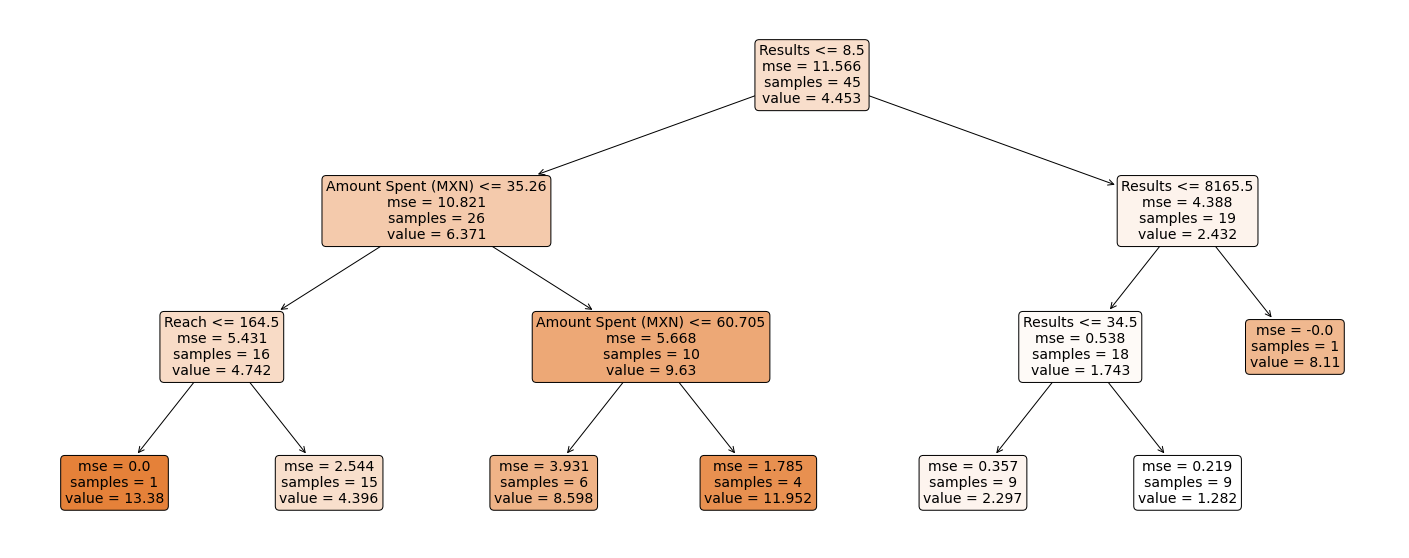

In [0]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
plot_tree(modelo2.estimators_[0], 
              feature_names=X.columns, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [0]:
modelo2.predict(np.reshape([30, 20000, 1, 80, 6, 300], (1,6)))

array([10.15029414])

In [0]:
X.columns

Index(['Age', 'Impressions', 'Frequency', 'Reach', 'Results',
       'Amount Spent (MXN)'],
      dtype='object')